**Important**

Backtest results from 01/01/2008 to 05/14/2021. Feel free to explore the results file on your own.

In [128]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
results = pd.read_json('Results.json')
results

,RollingWindow,TotalPerformance,AlphaRuntimeStatistics,Charts,Orders,ProfitLoss,Statistics,RuntimeStatistics
M1_20080131,{'TradeStatistics': {'StartDateTime': '2008-01...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
M1_20080229,{'TradeStatistics': {'StartDateTime': '2008-01...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
M1_20080331,{'TradeStatistics': {'StartDateTime': '2008-02...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
M1_20080430,"{'TradeStatistics': {'StartDateTime': None, 'E...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
M1_20080531,{'TradeStatistics': {'StartDateTime': '2008-03...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
Fees,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-$459.89
Return,NaN,NaN,NaN,NaN,NaN,NaN,NaN,228.71 %
Equity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"$328,714.43"
Holdings,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"$328,224.00"


In [45]:
results.loc[:, 'Statistics':'RuntimeStatistics'].tail(27)

,Statistics,RuntimeStatistics
Total Trades,199,NaN
Average Win,3.21%,NaN
Average Loss,-2.47%,NaN
Compounding Annual Return,9.228%,NaN
Expectancy,0.495,NaN
Net Profit,228.714%,"$191,690.03"
Sharpe Ratio,0.563,NaN
Probabilistic Sharpe Ratio,3.238%,3.238%
Loss Rate,35%,NaN
Win Rate,65%,NaN


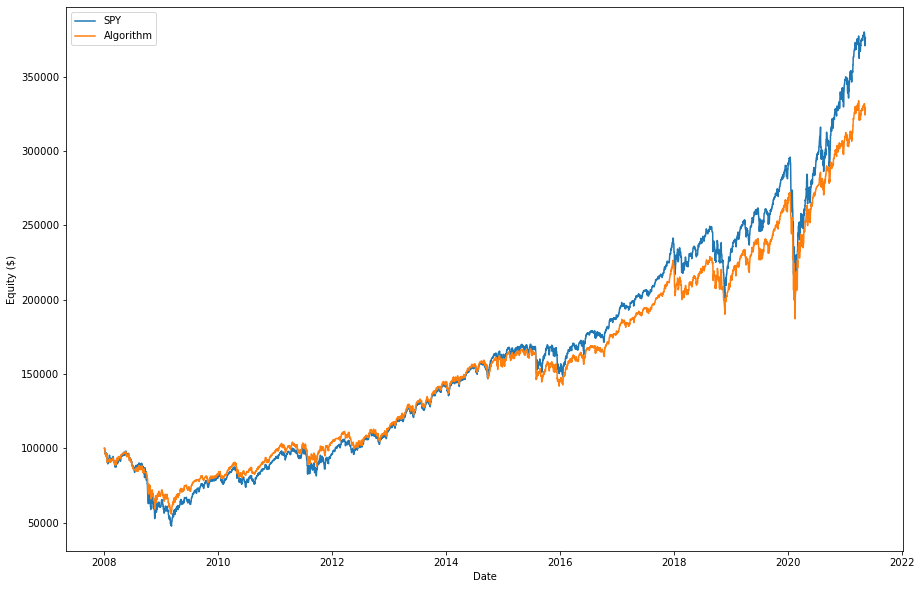

In [135]:
#Chart SPY equity vs Algorithm equity
equity_chart = results['Charts'].loc['Strategy Equity']['Series']['Equity']['Values']
bench_chart = results['Charts'].loc['Benchmark']['Series']['Benchmark']['Values']

bench_chart_vals = []
for value in bench_chart:
    fig = list(value.values())
    bench_chart_vals.append(fig[1])

equity_chart_vals = []
for value in equity_chart:
    fig = list(value.values())
    equity_chart_vals.append(fig[1])

bench = pd.DataFrame()
bench['SPY Price'] = bench_chart_vals
bench['pct change'] = bench['SPY Price'] / bench['SPY Price'].iloc[0]
bench['SPY Equity'] = 100000 * bench['pct change']
bench.set_index(pd.date_range(start='01/01/2008',
                              end='05/14/2021',
                              periods=4127), inplace=True)

equity = pd.DataFrame()
equity['Algo Equity'] = equity_chart_vals
equity.set_index(pd.date_range(start='01/01/2008',
                               end='05/14/2021',
                               periods=6819), inplace=True)

equity = equity.resample('D').ffill()
bench = bench.resample('D').ffill()

fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
ax.plot(bench['SPY Equity'], label='SPY')
ax.plot(equity['Algo Equity'], label='Algorithm')
ax.set_xlabel('Date')
ax.set_ylabel('Equity ($)')
ax.legend()

***Conclusion***

Overall, I'm not surprised by the results of this backtest. My hypothesis is that this strategy would perform very well during periods of fear but with little market movement; when the VIX (and therefore IV) is high and put premiums are more inflated and therefore selling of puts is more profitable. It makes sense that this strategy would perform worse than the market in a hyper-extended bull run and I think this is accounted for between 2016 and 2021. I would like to see how it performs in a period in a more nuetral to slightly bearish environment. 